<a href="https://colab.research.google.com/github/salim-hbk/ai-ml/blob/main/TomBrunoDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://pypi.org/project/Youtube2Images/1.1.0/
#Youtube2Images Package to convert any youtube video to frame images
#Dev.By Falah.G.Saleh
#13.04.2020

In [1]:
!pip install pytube


     |████████████████████████████████| 51kB 1.7MB/s 


In [2]:
# importing the module  
from pytube import YouTube  

In [4]:
import cv2 
import os 

SAVE_PATH = "./data" #to_do  

# link of the video to be downloaded  
link="https://www.youtube.com/watch?v=GbfVgE8sXF4"
yt = YouTube(link)
stream = yt.streams.first()
stream.download()
print('Task Completed!')  


Task Completed!


In [7]:
def convert_videolink_to_image(link="/content/Tom_Jerry.mp4"):
  # Read the video from specified path 
  # where to save  

  cam = cv2.VideoCapture("/content/Tom_Jerry.mp4") 
    
  try: 
        
      # creating a folder named data 
      if not os.path.exists('data'): 
          os.makedirs('data') 
    
  # if not created then raise error 
  except OSError: 
      print ('Error: Creating directory of data') 
    
  # frame 
  currentframe = 0
    
  while(True): 
        
      # reading from frame 
      ret,frame = cam.read() 
    
      if ret: 
          print("if video is still left continue creating images")
          # if video is still left continue creating images 
          name = './data/frame' + str(currentframe) + '.jpg'
          print ('Creating...' + name) 
    
          # writing the extracted images 
          cv2.imwrite(name, frame) 
    
          # increasing counter so that it will 
          # show how many frames are created 
          currentframe += 1
      else: 
          print("No video")
          break
    
  # Release all space and windows once done 
  cam.release() 
  cv2.destroyAllWindows() 

In [ ]:
convert_videolink_to_image()

In [9]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
  os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models


Cloning into 'models'...
remote: Enumerating objects: 2394, done.
remote: Counting objects: 100% (2394/2394), done.
remote: Compressing objects: 100% (1997/1997), done.
remote: Total 2394 (delta 565), reused 1414 (delta 370), pack-reused 0
Receiving objects: 100% (2394/2394), 30.77 MiB | 26.04 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

In [11]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

In [81]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
  """Wrapper function to visualize detections.

  Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
  """
  image_np_with_annotations = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    plt.imshow(image_np_with_annotations)


In [33]:
train_img_dir = 'data/'

img_names_array = ['frame0.jpg', 'frame103.jpg', 'frame103.jpg', 'frame1045.jpg'
, 'frame1049.jpg', 'frame1043.jpg', 'frame1043.jpg', 'frame1186.jpg', 'frame1186.jpg', 'frame1183.jpg', 'frame1190.jpg', 'frame1200.jpg', 'frame1859.jpg', 'frame1859.jpg']
train_images_np = []
for name in img_names_array:
  image_ = os.path.join(train_img_dir, name)
  train_images_np.append(load_image_into_numpy_array(image_))


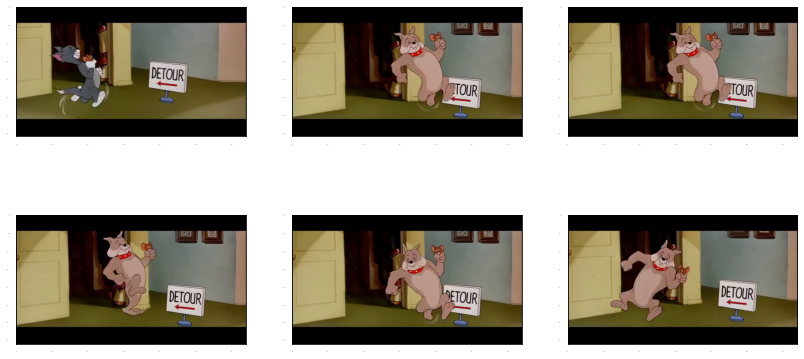

In [34]:
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

for idx, train_image_np in enumerate(train_images_np[6:12]):
  plt.subplot(2, 3, idx+1)
  plt.imshow(train_image_np)
plt.show()

In [114]:
gt_boxes = []
colab_utils.annotate(train_images_np, box_storage_pointer=gt_boxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

In [120]:
# gt_boxes = [array([[0.25      , 0.2046875 , 0.86833333, 0.4703125 ],
#         [0.15      , 0.396875  , 0.86833333, 0.621875  ]]),
#  array([[0.25      , 0.2140625 , 0.86833333, 0.471875  ],
#         [0.14166667, 0.4078125 , 0.87166667, 0.6203125 ]]),
#  array([[0.26      , 0.265625  , 0.85333333, 0.440625  ],
#         [0.145     , 0.4484375 , 0.855     , 0.615625  ]]),
#  array([[0.19833333, 0.234375  , 0.78333333, 0.484375  ]]),
#  array([[0.16666667, 0.3109375 , 0.755     , 0.6765625 ]]),
#  array([[0.28666667, 0.1375    , 0.79833333, 0.4171875 ]]),
#  array([[0.28      , 0.13125   , 0.78333333, 0.415625  ]]),
#  array([[0.14833333, 0.4125    , 0.77166667, 0.725     ]]),
#  array([[0.155     , 0.4234375 , 0.77166667, 0.71875   ]]),
#  array([[0.125     , 0.3640625 , 0.78333333, 0.60625   ],
#         [0.125     , 0.3640625 , 0.78333333, 0.60625   ]]),
#  array([[0.18666667, 0.403125  , 0.82333333, 0.715625  ]]),
#  array([[0.17666667, 0.1625    , 0.835     , 0.5390625 ]]),
#  array([[0.14      , 0.3171875 , 0.87333333, 0.4984375 ],
#         [0.14166667, 0.5015625 , 0.86833333, 0.6921875 ]]),
#  array([[0.12833333, 0.3265625 , 0.87166667, 0.4828125 ],
#         [0.23666667, 0.4953125 , 0.86166667, 0.7       ]])]

In [36]:
class_names = ['tom_cat', 'tom_cat', 'bruno_dog', 'tom_cat', 'tom_cat', 'tom_cat', 'tom_cat', 'bruno_dog', 'bruno_dog', 'bruno_dog', 'bruno_dog', 'bruno_dog', 'tom_cat', 'bruno_dog']


In [122]:
tom_class_id = 1
bruno_class_id = 2
num_classes = 2

label_id_offset = 1

train_image_tensors = []
gt_box_tensors  = []
gt_classes_one_hot_tensors = []

In [145]:
category_tom = {1: {'id': 1, 'name': 'tom_cat'}}
category_bruno = {2: {'id': 2, 'name': 'bruno'}}

categories = {}
categories[1] = {'id': 1, 'name': 'tom_cat'}
categories[2] = {'id': 2, 'name': 'bruno'}

In [150]:
train_images_np[0].shape

(360, 640, 3)

In [131]:
for (train_image_np, gt_box_np, class_number) in zip(train_images_np, gt_boxes, class_nameidxs):

  train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(train_image_np, dtype=tf.float32), axis=0))

  gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))
  if gt_box_np.shape[0] == 2:
    clazz = (0, 1)
    zero_indexed_groundtruth_classes = tf.convert_to_tensor((np.ones(shape=[gt_box_np.shape[0]], dtype=np.int32) * clazz))
  else:
    zero_indexed_groundtruth_classes = tf.convert_to_tensor((np.ones(shape=[gt_box_np.shape[0]], dtype=np.int32) * class_number)-1)
  
  gt_classes_one_hot_tensors.append(tf.one_hot(zero_indexed_groundtruth_classes, 2))

print('Done prepping data.')


Done prepping data.


In [135]:
gt_boxes[0]

array([[0.25      , 0.2046875 , 0.86833333, 0.4703125 ],
       [0.15      , 0.396875  , 0.86833333, 0.621875  ]])

{1: {'id': 1, 'name': 'tom_cat'}}
{1: {'id': 1, 'name': 'tom_cat'}}
{2: {'id': 2, 'name': 'bruno_dog'}}
{1: {'id': 1, 'name': 'tom_cat'}}
{1: {'id': 1, 'name': 'tom_cat'}}


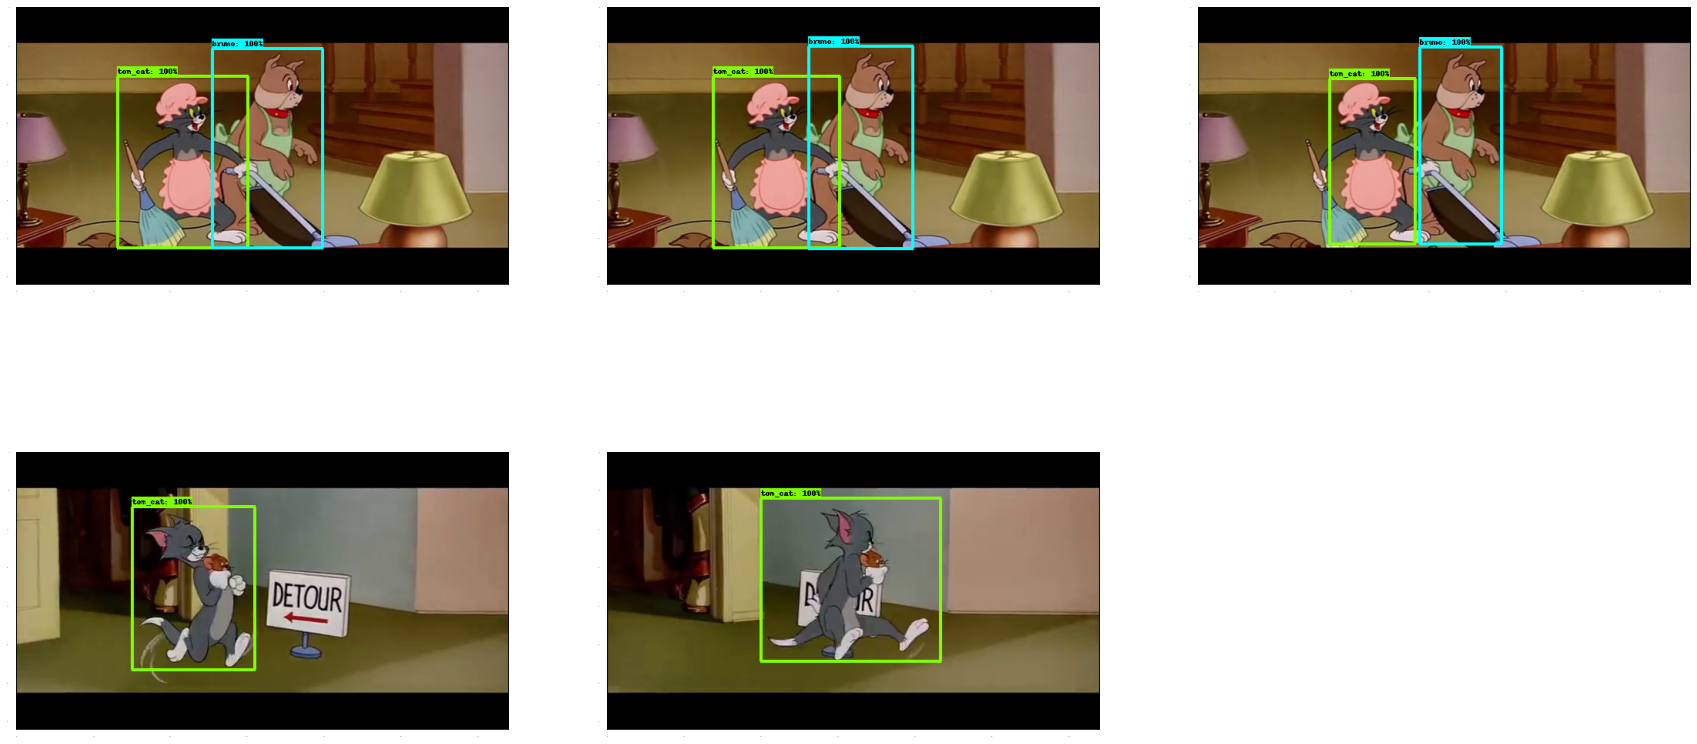

In [146]:
dummy_scores = np.array([1.0], dtype=np.float32)

dummy_scores_double = np.array([1.0, 1.0], dtype=np.float32)

plt.figure(figsize=(30, 15))

for i in range(5):
  plt.subplot(2, 3, i+1)
  print(category_index[i])
  if gt_boxes[i].shape[0] == 2:
    clazz = (1,2)
    plot_detections(train_images_np[i], gt_boxes[i], 
                               np.ones(shape=[gt_box_np.shape[0]], dtype=np.int32) * clazz, dummy_scores_double, categories)
  else:
    plot_detections(train_images_np[i], gt_boxes[i], 
                               np.ones(shape=[gt_box_np.shape[0]], dtype=np.int32), dummy_scores, category_tom)


plt.show()

In [147]:
# Download the checkpoint and put it into models/research/object_detection/test_data/

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

--2021-01-23 09:05:05--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.193.128, 2607:f8b0:400c:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.193.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz.1’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   159MB/s    in 1.5s    

2021-01-23 09:05:07 (159 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz.1’ saved [244817203/244817203]

mv: cannot move 'ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint' to 'models/research/object_detection/test_data/checkpoint': Directory not empty


In [152]:
tf.keras.backend.clear_session()
print('Building model and fine tuning it...')
num_classes = 2
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

config = config_util.get_configs_from_pipeline_file(pipeline_config)

Building model and fine tuning it...


In [153]:
tf.keras.backend.clear_session()

print('Building model and restoring weights for fine-tuning...', flush=True)
num_classes = 2
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

# Load pipeline config and build a detection model.
#
# Since we are working off of a COCO architecture which predicts 90
# class slots by default, we override the `num_classes` field here to be just
# one (for our new rubber ducky class).
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True
detection_model = model_builder.build(
      model_config=model_config, is_training=True)

# Set up object-based checkpoint restore --- RetinaNet has two prediction
# `heads` --- one for classification, the other for box regression.  We will
# restore the box regression head but initialize the classification head
# from scratch (we show the omission below by commenting out the line that
# we would add if we wanted to restore both heads)
fake_box_predictor = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    # _prediction_heads=detection_model._box_predictor._prediction_heads,
    #    (i.e., the classification head that we *will not* restore)
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
fake_model = tf.compat.v2.train.Checkpoint(
          _feature_extractor=detection_model._feature_extractor,
          _box_predictor=fake_box_predictor)
ckpt = tf.compat.v2.train.Checkpoint(model=fake_model)
ckpt.restore(checkpoint_path).expect_partial()

# Run model through a dummy image so that variables are created
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))
prediction_dict = detection_model.predict(image, shapes)
_ = detection_model.postprocess(prediction_dict, shapes)
print('Weights restored!')

Building model and restoring weights for fine-tuning...
Weights restored!


In [155]:
tf.keras.backend.set_learning_phase(True)

# These parameters can be tuned; since our training set has 5 images
# it doesn't make sense to have a much larger batch size, though we could
# fit more examples in memory if we wanted to.
batch_size = 9
learning_rate = 0.01
num_batches = 100

# Select variables in top layers to fine-tune.
trainable_variables = detection_model.trainable_variables
to_fine_tune = []
prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead']
for var in trainable_variables:
  if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
    to_fine_tune.append(var)

# Set up forward + backward pass for a single train step.
def get_model_train_step_function(model, optimizer, vars_to_fine_tune):
  """Get a tf.function for training step."""

  # Use tf.function for a bit of speed.
  # Comment out the tf.function decorator if you want the inside of the
  # function to run eagerly.
  @tf.function
  def train_step_fn(image_tensors,
                    groundtruth_boxes_list,
                    groundtruth_classes_list):
    """A single training iteration.

    Args:
      image_tensors: A list of [1, height, width, 3] Tensor of type tf.float32.
        Note that the height and width can vary across images, as they are
        reshaped within this function to be 640x640.
      groundtruth_boxes_list: A list of Tensors of shape [N_i, 4] with type
        tf.float32 representing groundtruth boxes for each image in the batch.
      groundtruth_classes_list: A list of Tensors of shape [N_i, num_classes]
        with type tf.float32 representing groundtruth boxes for each image in
        the batch.

    Returns:
      A scalar tensor representing the total loss for the input batch.
    """
    shapes = tf.constant(batch_size * [[360, 640, 3]], dtype=tf.int32)
    model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list=groundtruth_classes_list)
    with tf.GradientTape() as tape:
      preprocessed_images = tf.concat(
          [detection_model.preprocess(image_tensor)[0]
           for image_tensor in image_tensors], axis=0)
      prediction_dict = model.predict(preprocessed_images, shapes)
      losses_dict = model.loss(prediction_dict, shapes)
      total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']
      gradients = tape.gradient(total_loss, vars_to_fine_tune)
      optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))
    return total_loss

  return train_step_fn

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
train_step_fn = get_model_train_step_function(
    detection_model, optimizer, to_fine_tune)

print('Start fine-tuning!', flush=True)
for idx in range(num_batches):
  # Grab keys for a random subset of examples
  all_keys = list(range(len(train_images_np)))
  random.shuffle(all_keys)
  example_keys = all_keys[:batch_size]

  # Note that we do not do data augmentation in this demo.  If you want a
  # a fun exercise, we recommend experimenting with random horizontal flipping
  # and random cropping :)
  gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
  gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
  image_tensors = [train_image_tensors[key] for key in example_keys]

  # Training step (forward pass + backwards pass)
  total_loss = train_step_fn(image_tensors, gt_boxes_list, gt_classes_list)

  if idx % 10 == 0:
    print('batch ' + str(idx) + ' of ' + str(num_batches)
    + ', loss=' +  str(total_loss.numpy()), flush=True)

print('Done fine-tuning!')

Start fine-tuning!


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


batch 0 of 100, loss=1.3202106
batch 10 of 100, loss=0.2781601
batch 20 of 100, loss=0.20637459
batch 30 of 100, loss=0.09254613
batch 40 of 100, loss=0.059744515
batch 50 of 100, loss=0.09460465
batch 60 of 100, loss=0.073090985
batch 70 of 100, loss=0.048490513
batch 80 of 100, loss=0.087342456
batch 90 of 100, loss=0.057044245
Done fine-tuning!


In [179]:
test_images = []

for i in range(500):
  image_ = os.path.join(train_img_dir, 'frame'+ str(i) +'.jpg')
  test_images.append(np.expand_dims( load_image_into_numpy_array(image_) , axis=0))

test_images[0].shape

(1, 360, 640, 3)

In [180]:
def detect(input_tensor):

  preprocessed_image, shapes = detection_model.preprocess(input_tensor)
  y_hat = detection_model.predict(preprocessed_image, shapes)
  return detection_model.postprocess(y_hat, shapes)

In [182]:
for i in range(500):
  input_tensor = tf.convert_to_tensor(test_images[i], dtype=tf.float32)
  detections = detect(input_tensor)

  plot_detections(
      test_images[i][0],
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.uint32)
      + label_id_offset,
      detections['detection_scores'][0].numpy(),
      categories, figsize=(15, 20), image_name="gif_frame_" + ('%02d' % i) + ".jpg")

In [177]:
detections['detection_scores'][0].numpy().shape

(100,)

In [178]:
for i in range(500):
  os.remove('gif_frame_'+('%02d' % i)+'.jpg')

In [184]:
imageio.plugins.freeimage.download()

anim_file = 'duckies_test.gif'

filenames = glob.glob('gif_frame_*.jpg')
filenames = sorted(filenames)
last = -1
images = []
for filename in filenames:
  image = imageio.imread(filename)
  images.append(image)

imageio.mimsave(anim_file, images, 'GIF-FI', fps=7)

display(IPyImage(open(anim_file, 'rb').read()))